In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!ls -lha /content/drive/MyDrive/Geospatial_Workshop/Hurricane_Data


total 16K
drwx------ 2 root root 4.0K Jun 14 18:30 test
drwx------ 2 root root 4.0K Jun 14 18:30 test_another
drwx------ 2 root root 4.0K Jun 14 18:30 train_another
drwx------ 2 root root 4.0K Jun 14 18:30 validation_another


In [ ]:
input_path = '/content/drive/MyDrive/Geospatial_Workshop/Hurricane_Data/'

def print_file_sizes(input_path, subset):
    print('{}:'.format(subset))
    print('')
    path = input_path + subset + '/'
    for f in os.listdir(path):
        if not os.path.isdir(path + f):
            print(f.ljust(30) + str(round(os.path.getsize(path + f) / 1000000, 2)) + 'MB')
        else:
            sizes = [os.path.getsize(path+f+'/'+x)/1000000 for x in os.listdir(path + f)]
            print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))
    print('')
    
print_file_sizes(input_path, 'train_another')
print_file_sizes(input_path, 'validation_another')
print_file_sizes(input_path, 'test_another')
print_file_sizes(input_path, 'test')

train_another:

no_damage                     15.07MB (5000 files)
damage                        12.56MB (5000 files)

validation_another:

no_damage                     3.02MB (1000 files)
damage                        2.52MB (1000 files)

test_another:

damage                        20.12MB (8000 files)
no_damage                     3.01MB (1000 files)

test:

no_damage                     2.99MB (1000 files)
damage                        2.53MB (1000 files)



In [ ]:
image_df = pd.DataFrame({'path': list(Path(input_path).glob('**/*.jp*g'))})

image_df['damage'] = image_df['path'].map(lambda x: x.parent.stem)
image_df['data_split'] = image_df['path'].map(lambda x: x.parent.parent.stem)
image_df['location'] = image_df['path'].map(lambda x: x.stem)
image_df['lon'] = image_df['location'].map(lambda x: float(x.split('_')[0]))
image_df['lat'] = image_df['location'].map(lambda x: float(x.split('_')[-1]))
image_df['path'] = image_df['path'].map(lambda x: str(x)) # convert the path back to a string

image_df.head()

,path,damage,data_split,location,lon,lat
0,/content/drive/MyDrive/Geospatial_Workshop/Hur...,no_damage,validation_another,-95.081787_29.878390000000003,-95.081787,29.878390
1,/content/drive/MyDrive/Geospatial_Workshop/Hur...,no_damage,validation_another,-95.64142199999999_29.842178999999998,-95.641422,29.842179
2,/content/drive/MyDrive/Geospatial_Workshop/Hur...,no_damage,validation_another,-96.994261_28.535902,-96.994261,28.535902
3,/content/drive/MyDrive/Geospatial_Workshop/Hur...,no_damage,validation_another,-95.639014_29.840983,-95.639014,29.840983
4,/content/drive/MyDrive/Geospatial_Workshop/Hur...,no_damage,validation_another,-95.181954_30.033852000000003,-95.181954,30.033852


In [ ]:
image_df.damage.value_counts()

damage       15000
no_damage     8000
Name: damage, dtype: int64

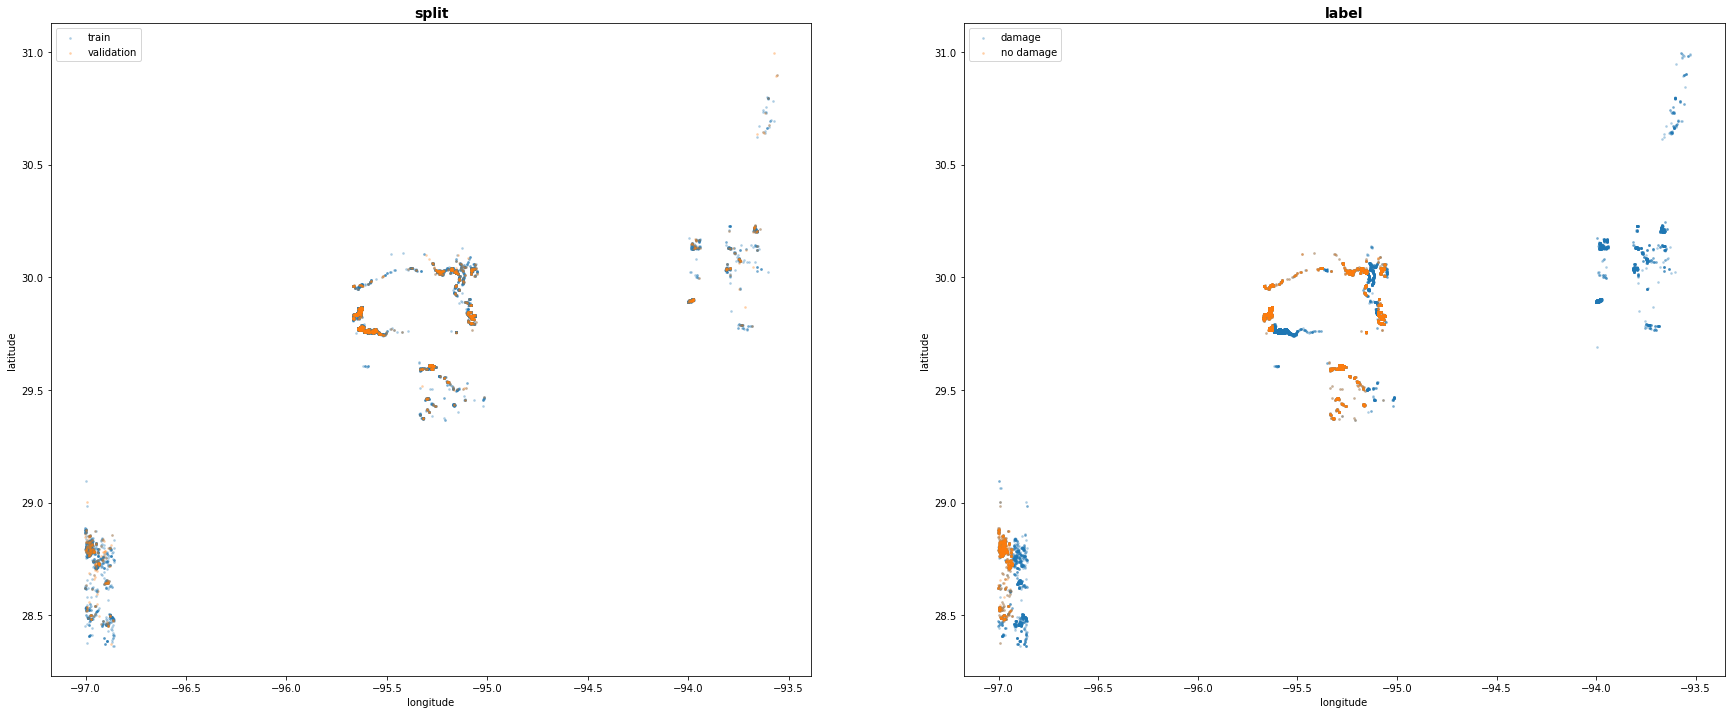

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,12))

s = 3
alpha = 0.25

# get the train-validation-test splits
image_df_train = image_df[image_df['data_split']=='train_another'].copy()
image_df_val = image_df[image_df['data_split']=='validation_another'].copy()
image_df_test = image_df[image_df['data_split']=='test_another'].copy()

# sort to ensure reproducible behaviour
image_df_train.sort_values('lat', inplace=True)
image_df_val.sort_values('lat', inplace=True)
image_df_test.sort_values('lat', inplace=True)
image_df_train.reset_index(drop=True,inplace=True)
image_df_val.reset_index(drop=True,inplace=True)
image_df_test.reset_index(drop=True,inplace=True)

ax[0].scatter(image_df_train['lon'], image_df_train['lat'], color='C0', s=s, alpha=alpha, label='train')
ax[0].scatter(image_df_val['lon'], image_df_val['lat'], color='C1', s=s, alpha=alpha, label='validation')

ax[0].set_title('split', fontsize=14, fontweight='bold')
ax[0].legend()
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')

image_df_dmg = image_df[image_df['damage']=='damage'].copy()
image_df_nodmg = image_df[image_df['damage']=='no_damage'].copy()

image_df_dmg.reset_index(drop=True,inplace=True)
image_df_nodmg.reset_index(drop=True,inplace=True)

ax[1].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='C0', s=s, alpha=alpha, label='damage')
ax[1].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='C1', s=s, alpha=alpha, label='no damage')

ax[1].set_title('label', fontsize=14, fontweight='bold')
ax[1].legend()
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')

plt.show(fig)

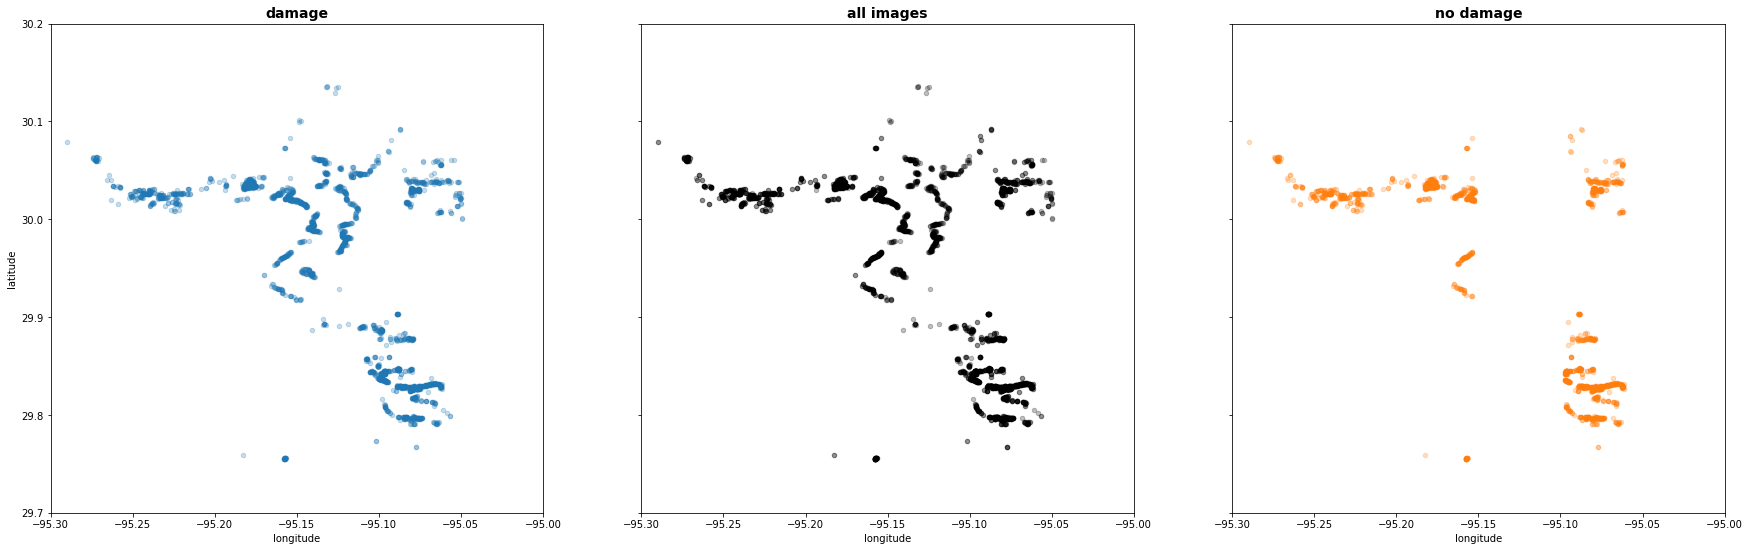

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,9), sharex=True, sharey=True)

s = 20
alpha = 0.25

ax[0].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='C0', s=s, alpha=alpha, label='damage')
ax[0].set_title('damage', fontsize=14, fontweight='bold')

ax[1].scatter(image_df_dmg['lon'], image_df_dmg['lat'], color='k', s=s, alpha=alpha, label='damage')
ax[1].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='k', s=s, alpha=alpha, label='no damage')
ax[1].set_title('all images', fontsize=14, fontweight='bold')

ax[2].scatter(image_df_nodmg['lon'], image_df_nodmg['lat'], color='C1', s=s, alpha=alpha, label='no damage')
ax[2].set_title('no damage', fontsize=14, fontweight='bold')

ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[2].set_xlabel('longitude')

ax[0].set_xlim(-95.3,-95)
ax[0].set_ylim(29.7,30.2)

plt.show(fig)

In [ ]:
import cv2
img = cv2.imread(image_df['path'][0], cv2.IMREAD_UNCHANGED)
np.shape(img)

(128, 128, 3)

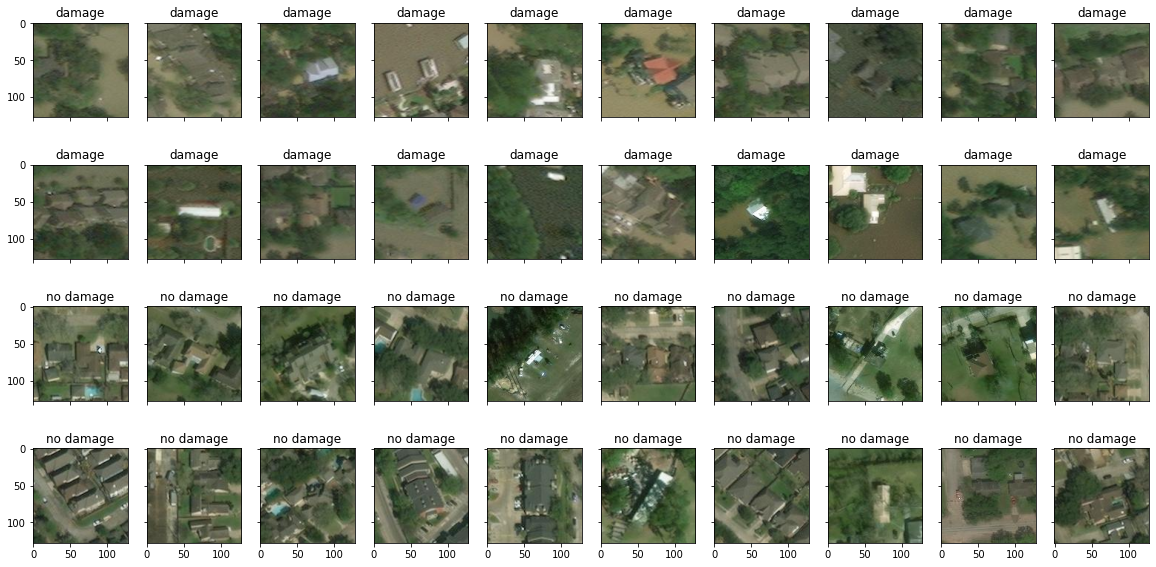

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(20,10))

ax = ax.flatten()

for i in range(20):
    img = cv2.imread(image_df_dmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('damage')
    
for i in range(20,40):
    img = cv2.imread(image_df_nodmg['path'][i], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i].set_title('no damage')
    
plt.show()

Text(0.5, 1.0, 'no damage')

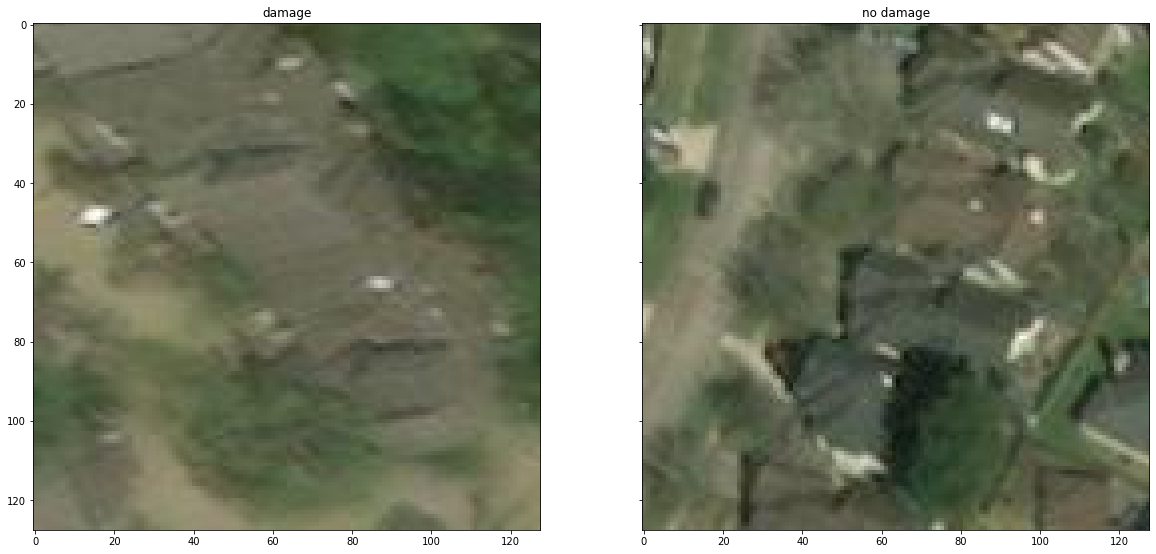

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(20,10))
img = cv2.imread(image_df_dmg['path'][1], cv2.IMREAD_UNCHANGED)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('damage')

img = cv2.imread(image_df_nodmg['path'][1], cv2.IMREAD_UNCHANGED)
ax[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].set_title('no damage')


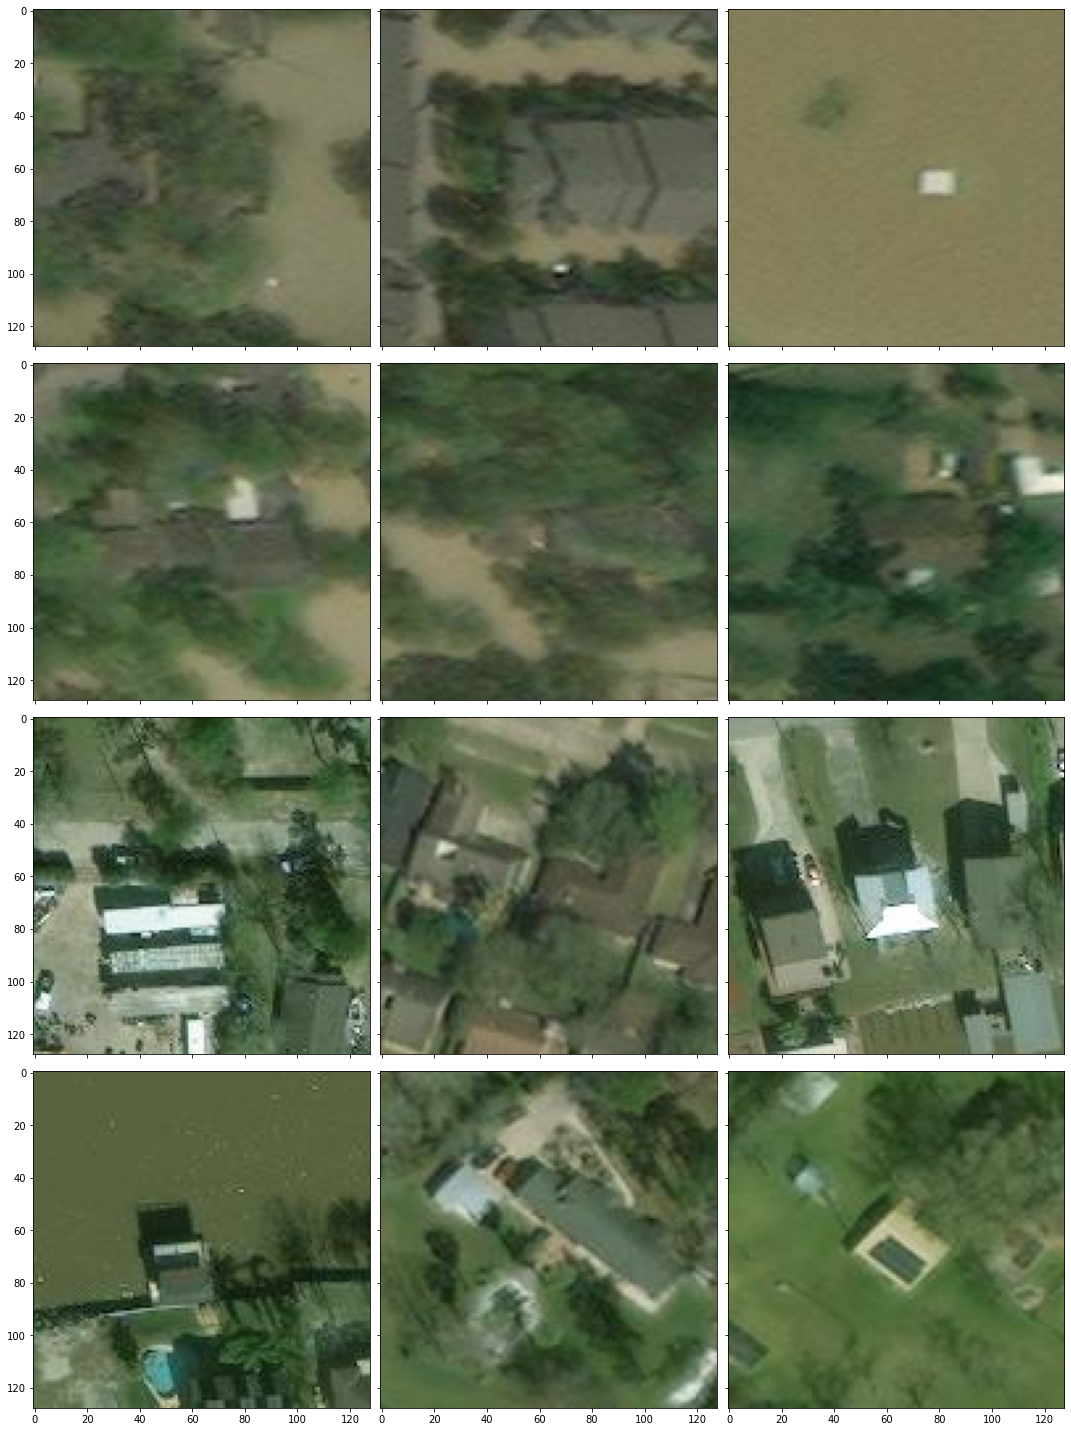

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(15,20))

ax = ax.flatten()

selected_dmg = np.array([0,1,2,3,4,5])*100
selected_nodmg = np.array([0,1,2,3,4,5])*99

for i in range(6):
    img = cv2.imread(image_df_dmg['path'][selected_dmg[i]], cv2.IMREAD_UNCHANGED)
    ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #ax[i].set_title('damage')
    
for i in range(6):
    img = cv2.imread(image_df_nodmg['path'][selected_nodmg[i]], cv2.IMREAD_UNCHANGED)
    ax[i+6].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #ax[i+6].set_title('no damage')
    
fig.tight_layout()
plt.show()

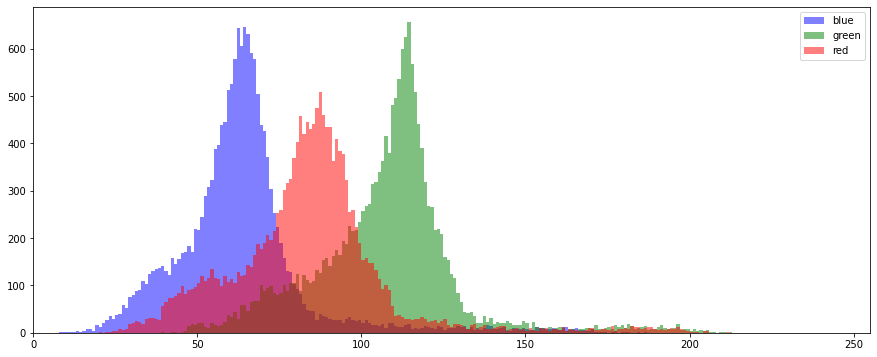

In [ ]:
jpg_channels = ['blue','green','red']
jpg_channel_colors = ['b','g','r']

fig, ax = plt.subplots(figsize=(15,6))

for i in range(len(jpg_channels)):
    ax.hist(img[:,:,i].flatten(), bins=np.arange(256),
            label=jpg_channels[i], color=jpg_channel_colors[i], alpha=0.5)
    ax.legend()
    
ax.set_xlim(0,255)
    
plt.show(fig)

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
# paths
train_path = image_df_train['path'].copy().values
val_path = image_df_val['path'].copy().values
test_path = image_df_test['path'].copy().values

# labels
train_labels = np.zeros(len(image_df_train), dtype=np.int8)
train_labels[image_df_train['damage'].values=='damage'] = 1

val_labels = np.zeros(len(image_df_val), dtype=np.int8)
val_labels[image_df_val['damage'].values=='damage'] = 1

test_labels = np.zeros(len(image_df_test), dtype=np.int8)
test_labels[image_df_test['damage'].values=='damage'] = 1

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_path, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_path, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_path, test_labels))

# note that the `numpy()` function is required to grab the actual values from the Dataset
for path, label in train_ds.take(5):
    print("path  : ", path.numpy().decode('utf-8'))
    print("label : ", label.numpy())

path  :  /content/drive/MyDrive/Geospatial_Workshop/Hurricane_Data/train_another/damage/-96.860867_28.363774.jpeg
label :  1
path  :  /content/drive/MyDrive/Geospatial_Workshop/Hurricane_Data/train_another/damage/-96.861175_28.36379.jpeg
label :  1
path  :  /content/drive/MyDrive/Geospatial_Workshop/Hurricane_Data/train_another/damage/-96.90485699999999_28.375248.jpeg
label :  1
path  :  /content/drive/MyDrive/Geospatial_Workshop/Hurricane_Data/train_another/damage/-96.905101_28.375287.jpeg
label :  1
path  :  /content/drive/MyDrive/Geospatial_Workshop/Hurricane_Data/train_another/damage/-96.90476600000001_28.375337.jpeg
label :  1


In [ ]:
# this function wraps `cv2.imread` - we treat it as a 'standalone' function, and therefore can use
# eager execution (i.e. the use of `numpy()`) to get a string of the path.
# note that no tensorflow functions are used here
def cv2_imread(path, label):
    # read in the image, getting the string of the path via eager execution
    img = cv2.imread(path.numpy().decode('utf-8'), cv2.IMREAD_UNCHANGED)
    # change from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, label

# this function assumes that the image has been read in, and does some transformations on it
# note that only tensorflow functions are used here
def tf_cleanup(img, label):
    # convert to Tensor
    img = tf.convert_to_tensor(img)
    # unclear why, but the jpeg is read in as uint16 - convert to uint8
    img = tf.dtypes.cast(img, tf.uint8)
    # set the shape of the Tensor
    img.set_shape((128, 128, 3))
    # convert to float32, scaling from uint8 (0-255) to float32 (0-1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image
    img = tf.image.resize(img, [128, 128])
    # convert the labels into a Tensor and set the shape
    label = tf.convert_to_tensor(label)
    label.set_shape(())
    return img, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

# map the cv2 wrapper function using `tf.py_function`
train_ds = train_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                        num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                    num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda path, label: tuple(tf.py_function(cv2_imread, [path, label], [tf.uint16, label.dtype])),
                      num_parallel_calls=AUTOTUNE)

# map the TensorFlow transformation function - no need to wrap
train_ds = train_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(tf_cleanup, num_parallel_calls=AUTOTUNE)

In [ ]:
def rotate_augmentation(img, label):
    # rotate 0, 90, 180, or 270 degrees with 25% probability for each
    img = tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32, seed=1111))
    return img, label

def flip_augmentation(img, label):
    # flip with 50% probability for left-right and up-down
    img = tf.image.random_flip_left_right(img, seed=2222)
    img = tf.image.random_flip_up_down(img, seed=3333)
    return img, label

# map the augmentations, creating a new Dataset
augmented_train_ds = train_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_train_ds = augmented_train_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

augmented_val_ds = val_ds.map(rotate_augmentation, num_parallel_calls=AUTOTUNE)
augmented_val_ds = augmented_val_ds.map(flip_augmentation, num_parallel_calls=AUTOTUNE)

# concatenate the augmented and original datasets
train_ds = train_ds.concatenate(augmented_train_ds)
val_ds = val_ds.concatenate(augmented_val_ds)

In [ ]:
# double the number of samples in the training and validation splits, due to our augmentation procedure
n_train = len(train_labels)*2
n_val = len(val_labels)*2
n_test = len(test_labels)

# shuffle over the entire dataset, seeding the shuffling for reproducible results
train_ds = train_ds.shuffle(n_train, seed=208, reshuffle_each_iteration=True)
val_ds = val_ds.shuffle(n_val, seed=208, reshuffle_each_iteration=True)
test_ds = test_ds.shuffle(n_test, seed=208, reshuffle_each_iteration=True)

In [ ]:
n_train_check = 0
for element in train_ds:
    n_train_check = n_train_check + 1
print(n_train_check)

20000


In [ ]:
n_val_check = 0
for element in val_ds:
    n_val_check = n_val_check + 1
print(n_val_check)

4000


In [ ]:
# check that the image was read in correctly
for image, label in train_ds.take(1):
    print("image shape : ", image.numpy().shape)
    print("label       : ", label.numpy())

image shape :  (128, 128, 3)
label       :  0


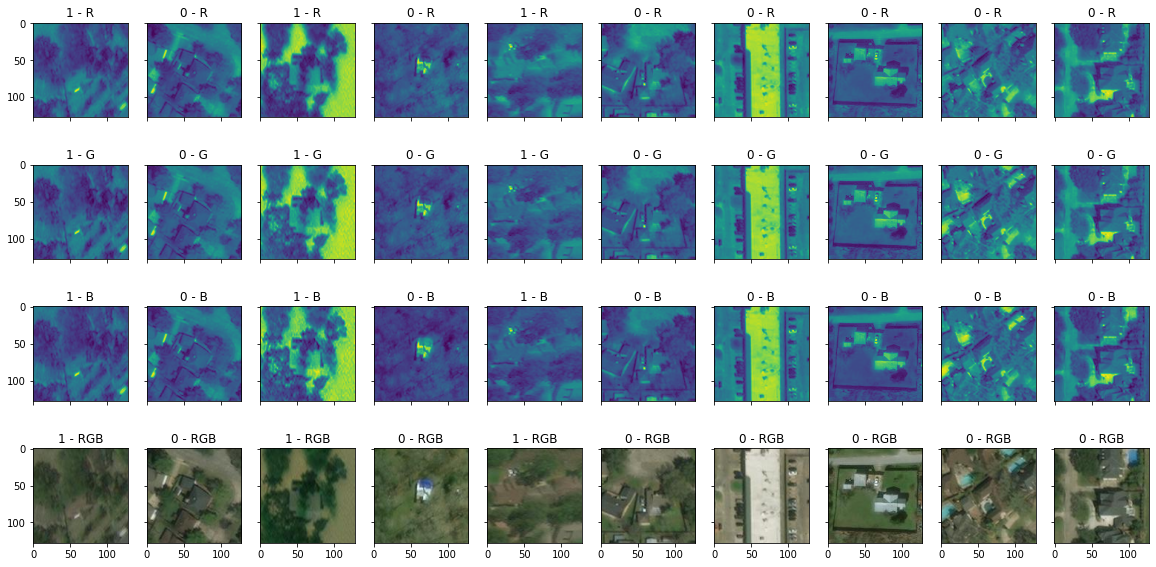

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(20,10))

i = 0

for image, label in train_ds.take(10):
    ax[0,i].imshow(image[:,:,0])
    ax[0,i].set_title('{} - {}'.format(label.numpy(), 'R'))
    ax[1,i].imshow(image[:,:,1])
    ax[1,i].set_title('{} - {}'.format(label.numpy(), 'G'))
    ax[2,i].imshow(image[:,:,2])
    ax[2,i].set_title('{} - {}'.format(label.numpy(), 'B'))
    ax[3,i].imshow(image)
    ax[3,i].set_title('{} - {}'.format(label.numpy(), 'RGB'))
    
    i = i+1

In [ ]:
BATCH_SIZE = 32

train_batches_ds = train_ds.batch(BATCH_SIZE)
val_batches_ds = val_ds.batch(BATCH_SIZE)
test_batches_ds = test_ds.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 128, 128, 3)
[0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1]


In [ ]:
IMG_SHAPE = (128, 128, 3)

# create the base model from the pre-trained model VGG16
# note that, if using a Kaggle server, internet has to be turned on
pretrained_model = tf.keras.applications.vgg16.VGG16(input_shape=IMG_SHAPE,
                                                     include_top=False,
                                                     weights='imagenet')

# freeze the convolutional base
pretrained_model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
feature_batch = pretrained_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 512)


In [ ]:
pretrained_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1,
                                         kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1992),
                                         bias_initializer=tf.keras.initializers.GlorotUniform(seed=1992))

prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
model = tf.keras.Sequential([pretrained_model,
                             global_average_layer,
                             prediction_layer])

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
initial_epochs = 15
steps_per_epoch = n_train//BATCH_SIZE
validation_steps = 20

loss0, accuracy0 = model.evaluate(val_batches_ds, steps=validation_steps)

20/20 [==============================] - 11s 57ms/step - loss: 0.7765 - accuracy: 0.5094


In [ ]:
history = model.fit(train_batches_ds,
                    epochs=initial_epochs,
                    validation_data=val_batches_ds,
                    validation_steps=validation_steps)

Epoch 1/15
625/625 [==============================] - 91s 70ms/step - loss: 0.6432 - accuracy: 0.5100 - val_loss: 0.5867 - val_accuracy: 0.5562
Epoch 2/15
625/625 [==============================] - 90s 70ms/step - loss: 0.5433 - accuracy: 0.6474 - val_loss: 0.5250 - val_accuracy: 0.7312
Epoch 3/15
625/625 [==============================] - 90s 70ms/step - loss: 0.4826 - accuracy: 0.7683 - val_loss: 0.4627 - val_accuracy: 0.7750
Epoch 4/15
625/625 [==============================] - 91s 71ms/step - loss: 0.4436 - accuracy: 0.8081 - val_loss: 0.4284 - val_accuracy: 0.8156
Epoch 5/15
625/625 [==============================] - 90s 71ms/step - loss: 0.4166 - accuracy: 0.8232 - val_loss: 0.4224 - val_accuracy: 0.7859
Epoch 6/15
625/625 [==============================] - 90s 71ms/step - loss: 0.3973 - accuracy: 0.8314 - val_loss: 0.3995 - val_accuracy: 0.8203
Epoch 7/15
625/625 [==============================] - 91s 71ms/step - loss: 0.3834 - accuracy: 0.8358 - val_loss: 0.3827 - val_accuracy:

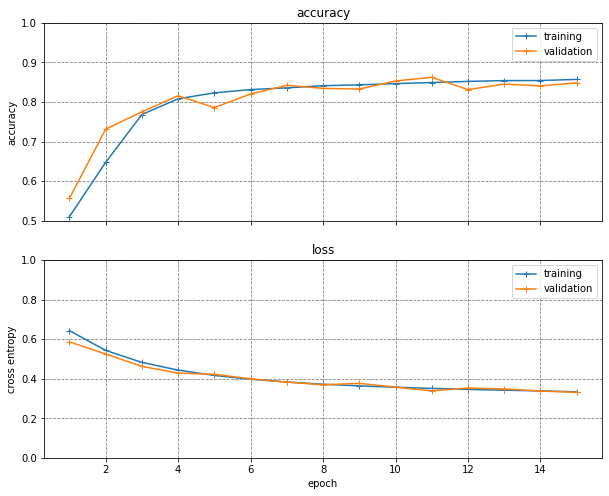

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)

x_plot = np.arange(1, initial_epochs+1)

ax[0].plot(x_plot, acc, '+-', label='training')
ax[0].plot(x_plot, val_acc, '+-', label='validation')
ax[0].legend()
ax[0].set_ylabel('accuracy')
ax[0].set_ylim(0.5, 1)
ax[0].grid(ls='--', c='C7')
ax[0].set_title('accuracy')

ax[1].plot(x_plot, loss, '+-', label='training')
ax[1].plot(x_plot, val_loss, '+-', label='validation')
ax[1].legend()
ax[1].set_ylabel('cross entropy')
ax[1].set_ylim(0, 1)
ax[1].grid(ls='--', c='C7')
ax[1].set_title('loss')
ax[1].set_xlabel('epoch')

plt.show()

In [ ]:
# unfreeze the layers
pretrained_model.trainable = True

# let's take a look to see how many layers are in the base model
print("Number of layers in the pre-trained model: ", len(pretrained_model.layers))

Number of layers in the pre-trained model:  19


In [ ]:
# fine-tune from this layer onwards
fine_tune_at = 15

# freeze all the layers before the `fine_tune_at` layer
for layer in pretrained_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/75),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 7,079,937
Non-trainable params: 7,635,264
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
len(model.trainable_variables)

8

In [ ]:
fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1]+1,
                         validation_data=val_batches_ds,
                         validation_steps=validation_steps)

Epoch 16/65
625/625 [==============================] - 108s 93ms/step - loss: 0.2824 - accuracy: 0.8791 - val_loss: 0.2552 - val_accuracy: 0.8844
Epoch 17/65
625/625 [==============================] - 116s 86ms/step - loss: 0.2260 - accuracy: 0.9043 - val_loss: 0.1986 - val_accuracy: 0.9312
Epoch 18/65
625/625 [==============================] - 95s 80ms/step - loss: 0.1982 - accuracy: 0.9153 - val_loss: 0.1998 - val_accuracy: 0.9219
Epoch 19/65
625/625 [==============================] - 96s 79ms/step - loss: 0.1769 - accuracy: 0.9253 - val_loss: 0.2057 - val_accuracy: 0.9203
Epoch 20/65
625/625 [==============================] - 96s 79ms/step - loss: 0.1629 - accuracy: 0.9317 - val_loss: 0.1564 - val_accuracy: 0.9359
Epoch 21/65
625/625 [==============================] - 95s 79ms/step - loss: 0.1499 - accuracy: 0.9374 - val_loss: 0.1701 - val_accuracy: 0.9328
Epoch 22/65
625/625 [==============================] - 95s 79ms/step - loss: 0.1377 - accuracy: 0.9417 - val_loss: 0.1606 - val_

In [ ]:
val_loss, val_accuracy = model.evaluate(val_batches_ds)

125/125 [==============================] - 16s 53ms/step - loss: 0.1355 - accuracy: 0.9580


In [ ]:
test_loss, test_accuracy = model.evaluate(test_batches_ds)

282/282 [==============================] - 2661s 57ms/step - loss: 0.1711 - accuracy: 0.9424


In [ ]:
# extract images and labels from the batches, and store predictions
eval_labels = np.array([])
eval_predictions = np.array([])
first = True
for images, labels in test_batches_ds.take(-1): #take all the batches
    if first:
        eval_images = images.numpy()
        first = False
    else:
        eval_images = np.concatenate((eval_images, images.numpy()), axis=0)
    eval_labels = np.append(eval_labels, labels.numpy())
    eval_predictions = np.append(eval_predictions, model.predict_on_batch(images).numpy())
    
# convert predictions from logit to binary
eval_predictions[eval_predictions>=0] = 1
eval_predictions[eval_predictions<0] = 0

# change dtype to int
eval_predictions = eval_predictions.astype(int)
eval_labels = eval_labels.astype(int)

# check that we extracted the images and the labels correctly
print("eval_images      : ", eval_images.shape)
print("eval_labels      : ", eval_labels.shape)
print("eval_predictions : ", eval_predictions.shape)

AttributeError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(eval_labels, eval_predictions)
confusion_mtx

In [ ]:
from sklearn.metrics import f1_score

TN = confusion_mtx[0,0]
FN = confusion_mtx[1,0]
TP = confusion_mtx[1,1]
FP = confusion_mtx[0,1]
F1 = f1_score(eval_labels, eval_predictions)

print('accuracy = {:.4f}'.format((TP+TN)/np.sum(confusion_mtx)))
print('positive recall = {:.4f}'.format(TP/(TP+FN)))
print('negative recall = {:.4f}'.format(TN/(TN+FP)))
print('positive precision = {:.4f}'.format(TP/(TP+FP)))
print('negative precision = {:.4f}'.format(TN/(TN+FN)))

In [ ]:
b_TP = TP/8
b_FN = FN/8

print('accuracy = {:.4f}'.format((b_TP+TN)/np.sum(2000)))
print('positive recall = {:.4f}'.format(b_TP/(b_TP+b_FN)))
print('negative recall = {:.4f}'.format(TN/(TN+FP)))
print('positive precision = {:.4f}'.format(b_TP/(b_TP+FP)))
print('negative precision = {:.4f}'.format(TN/(TN+b_FN)))

In [ ]:
FP_eval_images = eval_images[(eval_labels==0)&(eval_predictions==1)]
FN_eval_images = eval_images[(eval_labels==1)&(eval_predictions==0)]

selected_FP = np.arange(10, dtype=int)*2
selected_FN = np.arange(10, dtype=int)*2

fig, ax = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True, figsize=(20,16))

ax = ax.flatten()

for i in range(10):
    ax[i].imshow(FP_eval_images[selected_FP[i]])
    
for i in range(10):
    ax[i+10].imshow(FN_eval_images[selected_FN[i]])
    
fig.tight_layout()
plt.show()